# Exercise 4: Logistic Regression, Bayes and EM

## In this exercise we will perform the following:
1. Implement Logistic Regression algorithm.
1. Implement EM algorithm.
1. Implement Navie Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions:  206172280_309882298 

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data
(2 points each - 8 points total)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

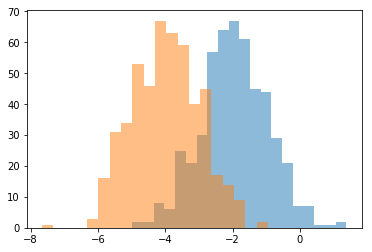

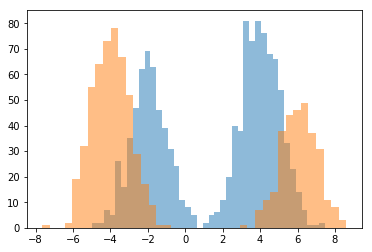

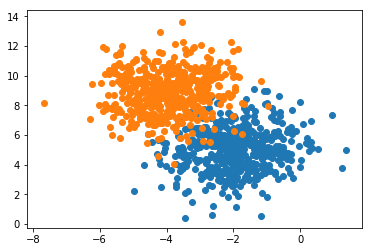

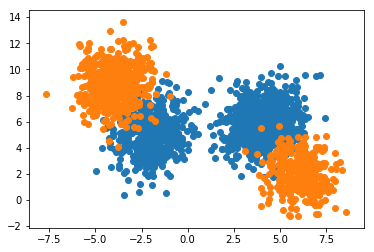

In [4]:
#### Your code here ####
thousand_Training_set = training_set.iloc[:1000,:]
x_1_0 = thousand_Training_set[thousand_Training_set['y'] == 0]['x1'].values
x_1_1 = thousand_Training_set[thousand_Training_set['y'] == 1]['x1'].values
plt.hist(x_1_0, bins=20, alpha=0.5)  # `density=False` would make counts
plt.hist(x_1_1, bins=20, alpha=0.5)
plt.show()

x_2_0 = training_set[training_set['y'] == 0]['x1'].values
x_2_1 = training_set[training_set['y'] == 1]['x1'].values
plt.hist(x_2_0, bins=40, alpha=0.5)  # `density=False` would make counts
plt.hist(x_2_1, bins=40, alpha=0.5)
plt.show()

y_scatter_class0 = thousand_Training_set[thousand_Training_set['y'] == 0]['x2'].values
y_scatter_class1 = thousand_Training_set[thousand_Training_set['y'] == 1]['x2'].values
plt.scatter(x_1_0, y_scatter_class0)
plt.scatter(x_1_1, y_scatter_class1)
plt.show()

y_scatter_class0 = training_set[training_set['y'] == 0]['x2'].values
y_scatter_class1 = training_set[training_set['y'] == 1]['x2'].values
plt.scatter(x_2_0, y_scatter_class0)
plt.scatter(x_2_1, y_scatter_class1)
plt.show()

## Logistic Regression

(20 Points)

Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [5]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        np.random.seed(random_state)
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.theta = None

    def Bias(self, X):
        oneArray = np.ones_like(X[:,0])
        return np.column_stack((oneArray, X))

    def InitTheta(self, X):
        self.theta = np.random.random(size = len(X[0,:]))

    def HOfX(self, X):
        return 1/(1 + np.exp(X.dot(np.dot(-1, self.theta))))
    

    def JofTheta(self, X, y):
        hTheta = self.HOfX(X)
        firstPart = (-1)*y.dot(np.log(hTheta))
        secondPartA = np.subtract(1,y)
        secondPartB = np.log(np.subtract(1,hTheta))
        secondPart = secondPartA.dot(secondPartB)
        J = np.sum(np.subtract(firstPart, secondPart))
        return J / len(X)
        

    def gradient_descent(self, X, y):
      #TODO remove J history
        self.J_history = [] 
        itr = 0
        while itr < self.n_iter: 
            if len(self.J_history) >= 2:
                if (self.J_history[-2] - self.J_history[-1]) <= self.eps:
                    break
            hTheta = self.HOfX(X)
            star = np.subtract(hTheta, y)
            sigma = np.matmul(star, X)
            self.theta = np.subtract(self.theta, (sigma.dot(self.eta))) #/len(y)
            self.J_history.append(self.JofTheta(X, y))
            itr += 1

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """        
        XData = self.Bias(X)
        self.InitTheta(XData)
        self.gradient_descent(XData,y)
        return XData
    
    def predict(self, X):
        """Return the predicted class label"""
        rinted = None
        if (len(X[0,:]) != len(self.theta)):
            rinted = np.rint(self.HOfX(self.Bias(X)))
        else:
            rinted = np.rint(self.HOfX(X))
        return rinted
             
    def calculateAccuracy(self, X, y):
        sum = 0
        if(len(self.theta) == len(X[0,:]) + 1):
            biasedX = self.Bias(X)
        else:
            biasedX = X
        pred = self.predict(biasedX)
        for i in range(len(y)):
            if pred[i] ==y[i]:
                sum = sum + 1
        return sum / len(y)
    

## Cross Validation

(10 points)

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [6]:
#### Your code here ####
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

# initialize best combination process
bestCombination = None
bestResult = -1

#5-fold cross validation
numOfCrossValidationGroups = 5

# All etas and epssilon combinations
mesh = np.array(np.meshgrid(etas, epss))
combinations = mesh.T.reshape(-1, 2)

shuffled = training_set.values
np.take(shuffled,np.random.permutation(shuffled.shape[0]),axis = 0,out = shuffled)
X_s_training, y_s_training = shuffled[:,:-1], shuffled[:,-1]

splitsLength = len(X_s_training[:,0]) // numOfCrossValidationGroups
for combination in combinations:
    sumOfResults = 0
    firstInstaceIndex = 0
    currentLogic = LogisticRegressionGD(combination[0], 10000, combination[1])
    # gradient descent with all possible data cuts with the current combination
    for i in range(numOfCrossValidationGroups):
        if i == numOfCrossValidationGroups - 1:
            XValidationIteration = X_s_training[firstInstaceIndex:,:]
            yValidationIteration = y_s_training[firstInstaceIndex:]
            XTrainIteration = X_s_training[:firstInstaceIndex,:]
            yTrainIteration = y_s_training[:firstInstaceIndex]
        else:
            XValidationIteration = X_s_training[firstInstaceIndex:(firstInstaceIndex + splitsLength),:]
            yValidationIteration = y_s_training[firstInstaceIndex:(firstInstaceIndex + splitsLength)]
            XTrainIteration = np.concatenate((X_s_training[:firstInstaceIndex,:], X_s_training[(firstInstaceIndex + splitsLength):,:]), axis=0)
            yTrainIteration = np.concatenate((y_s_training[:firstInstaceIndex], y_s_training[(firstInstaceIndex + splitsLength):]), axis=0)
        currentLogic.fit(XTrainIteration,yTrainIteration)
        currentAccuracy = currentLogic.calculateAccuracy(XValidationIteration,yValidationIteration)
        sumOfResults += currentAccuracy
        firstInstaceIndex += splitsLength
    avg = sumOfResults / numOfCrossValidationGroups
    if avg >= bestResult:
        bestCombination = combination
        bestResult = avg 

## Normal distribution pdf

(5 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [7]:
#### Your code here ####
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    firstPart = (1/(np.sqrt(2*np.pi)*sigma))
    secondPart = np.exp(np.divide((-1)*np.square((np.subtract(data, mu))), 2*np.square(sigma)))
    return np.multiply(firstPart, secondPart)

## Expectation Maximization

(20 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [8]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps

    # initial guesses for parameters
    def init_params(self, data):
        """
        Initialize distribution params
        """
        np.random.seed(42)
        self.responsibilities = np.zeros(shape=(len(data), self.k))
        self.sigma_array= np.zeros(shape=(1,self.k))
        self.mu_array = np.zeros(shape=(1,self.k))
        self.weights = np.zeros(shape=(1,self.k))
        lenOfPart =(int)((len(data[:])) / self.k)
        sortedData=np.sort(data[:])
        for i in range(0,(self.k - 1)):
          tmpData = sortedData[i * lenOfPart:(i+1) * lenOfPart]
          self.mu_array[0,i] = tmpData.mean()
          self.sigma_array[0,i] = ((np.sum((tmpData[:] - 1.0 * self.mu_array[0,i])**2))/(len(tmpData[:])))**(1/2)   
          self.weights[0,i] = 1.0 / self.k
        tmpData = sortedData[(self.k - 1) * lenOfPart:]
        self.mu_array[0,(self.k - 1)] = tmpData.mean()
        self.sigma_array[0,(self.k - 1)] = ((np.sum((tmpData[:] - 1.0 * self.mu_array[0,(self.k - 1)])**2))/(len(tmpData[:])))**(1/2)   
        self.weights[0,(self.k - 1)] = 1.0 / self.k
    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        for row in range(len(data[:])):
          for current_k in range(self.k):
            self.responsibilities[row,current_k] = self.weights[0,current_k] * norm_pdf(data[row],self.mu_array[0, current_k], self.sigma_array[0,current_k])
          self.responsibilities[row] = self.responsibilities[row] / np.sum(self.responsibilities[row])

    def maximization(self, data):
        """
        M step - updating distribution params
        """
        constant = (1/len(data[:]))
        weights_unshaped = constant * np.sum(self.responsibilities, axis=0)
        for current_k in range(self.k):
          self.weights[0,current_k] = weights_unshaped[current_k]
          self.mu_array[0, current_k] = (constant / self.weights[0, current_k]) * np.sum((self.responsibilities[:,current_k] * data))
          self.sigma_array[0, current_k] = np.sqrt((constant / self.weights[0, current_k]) * np.sum(self.responsibilities[:, current_k] * np.square(data - self.mu_array[0, current_k])))

    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        current_cost = 0.0
        previous_cost = None
        self.init_params(data)
        for i in range(self.n_iter):
          self.expectation(data)
          self.maximization(data)
          current_cost = self.cost_function(data)
          if previous_cost is not None:
            if (previous_cost - current_cost) < self.eps:
              break
          previous_cost = current_cost

    def get_dist_params(self):
        return self.sigma_array, self.mu_array, self.weights
    
    def  cost_function(self, data):
        TotalSigma = 0.0
        for currentInstance in range(0, len(data[:,])):
            innerSigma = 0.0
            for currentGausian in range(0,self.k):
                innerSigma += self.weights[0,currentGausian] * norm_pdf(data[currentInstance], self.mu_array[0,currentGausian],  self.sigma_array[0,currentGausian])
            TotalSigma = TotalSigma - innerSigma  
        return TotalSigma

    def pdfMixture(self, data):
        gauusianMixture = 0
        for currGauusian in range(self.k):
            gauusianMixture += self.weights[0,currGauusian] * norm_pdf(data,self.mu_array[0,currGauusian], self.sigma_array[0,currGauusian])
        return gauusianMixture


## Naive Bayes

(20 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [9]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1):
        self.k = k
        self.priorYEqualsC = []
        self.ems = []
    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        overallLen = len(X[:,0])
        for numberOfFeature in range(len(X[0,:])):
            self.ems.append([])
            for c in range(2):
                cData = X[y[:] == c]
                self.set_prior(cData,overallLen)
                cData = cData[:, numberOfFeature]
                em = EM(self.k)
                em.fit(cData)
                self.ems[numberOfFeature].append(em)

    def predict(self, X):
        """Return the predicted class label"""
        predArray = np.zeros_like(X[:,0])
        for i in range(len(X[:,0])):
            if self.get_instance_posterior(X[i,:], 1) > self.get_instance_posterior(X[i,:], 0):
                predArray[i] = 1
            else:
                predArray[i] = 0  
        return predArray

    def set_prior(self,relevant_data,overallLen):
        self.priorYEqualsC.append(len(relevant_data) / overallLen)
    
    
    def get_instance_posterior(self, instance, c):
        posterior = self.priorYEqualsC[c]
        for f in range(len(instance)):
            posterior = posterior * self.ems[f][c].pdfMixture(instance[f])
        return posterior

    def compute_accuracy(self, X_test, y_test):
        """
        Compute the accuracy of a given testset.
        
        """
        correct = 0.0
        predArray = self.predict(X_test)
        for i in range(len(predArray)):
            if predArray[i] == y_test[i]:
                correct = correct + 1
        return correct / len(X_test[:,0]) 

## Model evaluation

(10 points)

In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points

Logistic model on first 1000 training data accuracy is 0.965
Logistic model on first 500 test data accuracy is 0.938


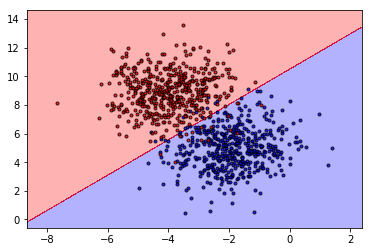

Naive bayes model on first 1000 training data accuracy is 0.968
Naive bayes model on first 500 test data accuracy is 0.942


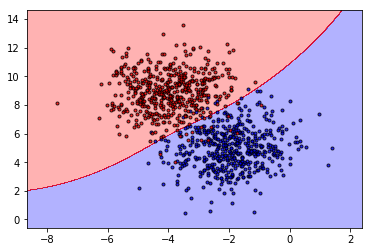

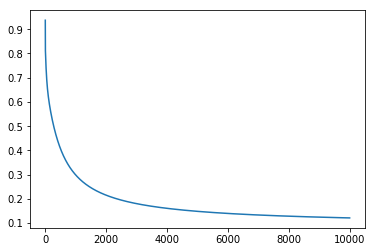

Logistic model on full training data accuracy is 0.809
Logistic model on full test data accuracy is 0.804


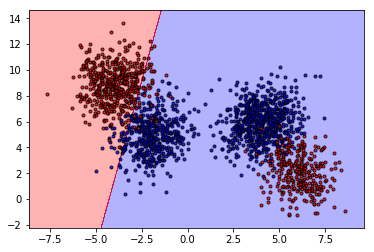

Naive bayes model on full training data accuracy is 0.9215
Naive bayes model on full test data accuracy is 0.902


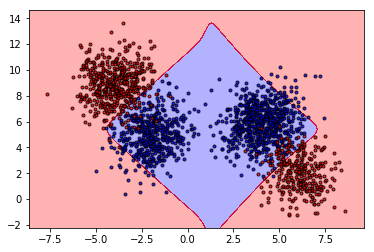

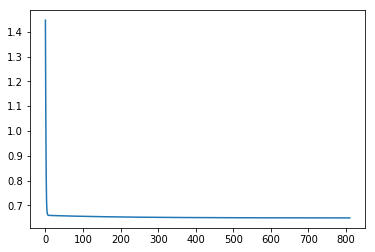

In [10]:
#### Your code here ####
X_training_set = X_training[:1000,:]
y_training_set = y_training[:1000]
X_test_set = X_test[:500,:]
y_test_set = y_test[:500]
logisticModel = LogisticRegressionGD(bestCombination[0],10000,bestCombination[1])
logisticModel.fit(X_training_set,y_training_set)
print(f"Logistic model on first 1000 training data accuracy is {logisticModel.calculateAccuracy(X_training_set,y_training_set)}")
print(f"Logistic model on first 500 test data accuracy is {logisticModel.calculateAccuracy(X_test_set,y_test_set)}")
plot_decision_regions(X_training_set, y_training_set, logisticModel)
plt.show()
nBayesModel = NaiveBayesGaussian(k=2)
nBayesModel.fit(X_training_set,y_training_set)
print(f"Naive bayes model on first 1000 training data accuracy is {nBayesModel.compute_accuracy(X_training_set,y_training_set)}")
print(f"Naive bayes model on first 500 test data accuracy is {nBayesModel.compute_accuracy(X_test_set,y_test_set)}")
plot_decision_regions(X_training_set, y_training_set, nBayesModel)
plt.show()
plt.plot(logisticModel.J_history)
plt.show()
logisticModel = LogisticRegressionGD(bestCombination[0],10000,bestCombination[1])
logisticModel.fit(X_training,y_training)
print(f"Logistic model on full training data accuracy is {logisticModel.calculateAccuracy(X_training,y_training)}")
print(f"Logistic model on full test data accuracy is {logisticModel.calculateAccuracy(X_test,y_test)}")
plot_decision_regions(X_training, y_training, logisticModel)
plt.show()
nBayesModel = NaiveBayesGaussian(k=2)
nBayesModel.fit(X_training,y_training)
print(f"Naive bayes model on full training data accuracy is {nBayesModel.compute_accuracy(X_training,y_training)}")
print(f"Naive bayes model on full test data accuracy is {nBayesModel.compute_accuracy(X_test,y_test)}")
plot_decision_regions(X_training, y_training, nBayesModel)
plt.show()
plt.plot(logisticModel.J_history)
plt.show()

## Open question

(7 points) 

Will Full Bayes get better results comparing to Naive Bayes on the following dataset? Explain. 

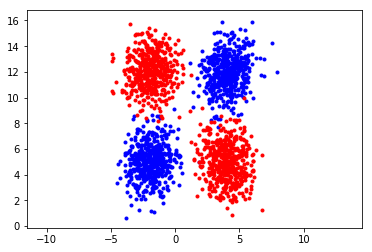

In [11]:
mean = [[-2,5], [-2, 12], [4, 12], [4, 5]]
cov = [[[1,0.2],[0.2,2]], [[1,0],[0,2]], [[1,0.2],[0.2,2]], [[1,-0.2],[-0.2,2]]]
x1 = []
x2 = []
y = []
size = [500, 500, 500, 500]
c = ['b', 'r']
for i in range(4):
    xx1,xx2 = np.random.multivariate_normal(mean[i],cov[i],size[i]).T
    x1.extend(xx1)
    x2.extend(xx2)
    y.extend([i%2] * size[i])
    plt.scatter(xx1,xx2, marker='.', c=c[i%2])
plt.axis('equal')
plt.show()

#### Your answer here ####


כפי שלמדנו , נאיב בייס מניח שאין תלות בין הפיצ'רים בהינתן קלאס. 
לכן, ניתן למשל להתבונן בנקודות האדומות ולראות כי קיים מתאם שלילי שאינו מושלם, או לחילופין להתבונן בנקודות הכחולות ולראות כי קיים ביניהם מתאם חיובי שאינו מושלם בין הפיצ'רים.
לכן בהכרח השונות המשותפת שונה מאפס וקיימת תלות בין הפיצ'רים. לכן הנחת נאיב בייס לא תהיה תקפה ויהיה יתרון בשימוש בבייס מלא 